In [2]:

import numpy as np
import keras
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator

In [3]:
# Set random state

np.random.seed(20)

In [4]:
# Load the data

train_raw = loadmat(r'E:\git\Door_number_finding_system\data/train_32x32.mat')
test_raw = loadmat(r'E:\git\Door_number_finding_system\data/test_32x32.mat')

In [5]:
# Load images and labels

train_images = np.array(train_raw['X'])
test_images = np.array(test_raw['X'])

train_labels = train_raw['y']
test_labels = test_raw['y']

In [6]:
print(type(train_images))
print(train_images.shape)
print(test_images.shape)

<class 'numpy.ndarray'>
(32, 32, 3, 73257)
(32, 32, 3, 26032)


In [7]:
# Fix the axes of the images

train_images = np.moveaxis(train_images, -1, 0)
test_images = np.moveaxis(test_images, -1, 0)

print(train_images.shape)
print(test_images.shape)

(73257, 32, 32, 3)
(26032, 32, 32, 3)


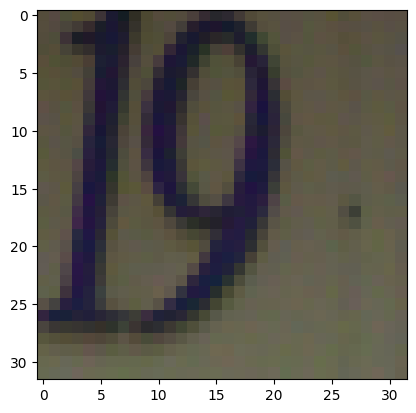

Label:  [9]


In [8]:
# Plot a random image and its label

plt.imshow(train_images[1])
plt.show()

print('Label: ', train_labels[1])

In [9]:
# Convert train and test images into 'float64' type

train_images = train_images.astype('float64')
test_images = test_images.astype('float64')

In [10]:
# Convert train and test labels into 'int64' type

train_labels = train_labels.astype('int64')
test_labels = test_labels.astype('int64')

In [11]:
# Normalize the images data

print('Min: {}, Max: {}'.format(train_images.min(), train_images.max()))

train_images /= 255.0
test_images /= 255.0

Min: 0.0, Max: 255.0


In [12]:
# One-hot encoding of train and test labels

lb = LabelBinarizer()
train_labels = lb.fit_transform(train_labels)
test_labels = lb.fit_transform(test_labels)

In [13]:
# Split train data into train and validation sets

X_train, X_val, y_train, y_val = train_test_split(train_images, train_labels, test_size=0.15, random_state=22)

In [14]:
y_val.shape

(10989, 10)

In [15]:
# Data augmentation

datagen = ImageDataGenerator(rotation_range=8,
                             zoom_range=[0.95, 1.05],
                             height_shift_range=0.10,
                             shear_range=0.15)

In [16]:
# Define actual model

keras.backend.clear_session()

model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Dropout(0.3),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.4),    
    keras.layers.Dense(10,  activation='softmax')
])

early_stopping = keras.callbacks.EarlyStopping(patience=8)
optimizer = keras.optimizers.Adam(lr=1e-3, amsgrad=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('/kaggle/working/best_cnn.h5', save_best_only=True)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

c:\Users\Sanmitha\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 16, 16, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        1

In [18]:
# Fit model in order to make predictions

history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),
                              epochs=10, validation_data=(X_val, y_val),
                              callbacks=[early_stopping, model_checkpoint])

C:\Users\Sanmitha\AppData\Local\Temp\ipykernel_6792\2268767187.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=128),


Epoch 1/10
487/487 [==============================] - 154s 314ms/step - loss: 2.1578 - accuracy: 0.2264 - val_loss: 1.7900 - val_accuracy: 0.3708
Epoch 2/10
487/487 [==============================] - 154s 317ms/step - loss: 1.6477 - accuracy: 0.4016 - val_loss: 1.0748 - val_accuracy: 0.6208
Epoch 3/10
487/487 [==============================] - 4004s 8s/step - loss: 1.0883 - accuracy: 0.6226 - val_loss: 0.5114 - val_accuracy: 0.8402
Epoch 4/10
487/487 [==============================] - 157s 323ms/step - loss: 0.5629 - accuracy: 0.8327 - val_loss: 0.3252 - val_accuracy: 0.9047
Epoch 5/10
487/487 [==============================] - 666s 1s/step - loss: 0.4383 - accuracy: 0.8739 - val_loss: 0.2704 - val_accuracy: 0.9227
Epoch 6/10
487/487 [==============================] - 157s 323ms/step - loss: 0.3797 - accuracy: 0.8905 - val_loss: 0.2661 - val_accuracy: 0.9248
Epoch 7/10
487/487 [==============================] - 1524s 337ms/step - loss: 0.3495 - accuracy: 0.9006 - val_loss: 0.2395 - val

In [19]:
# Evaluate train and validation accuracies and losses

train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

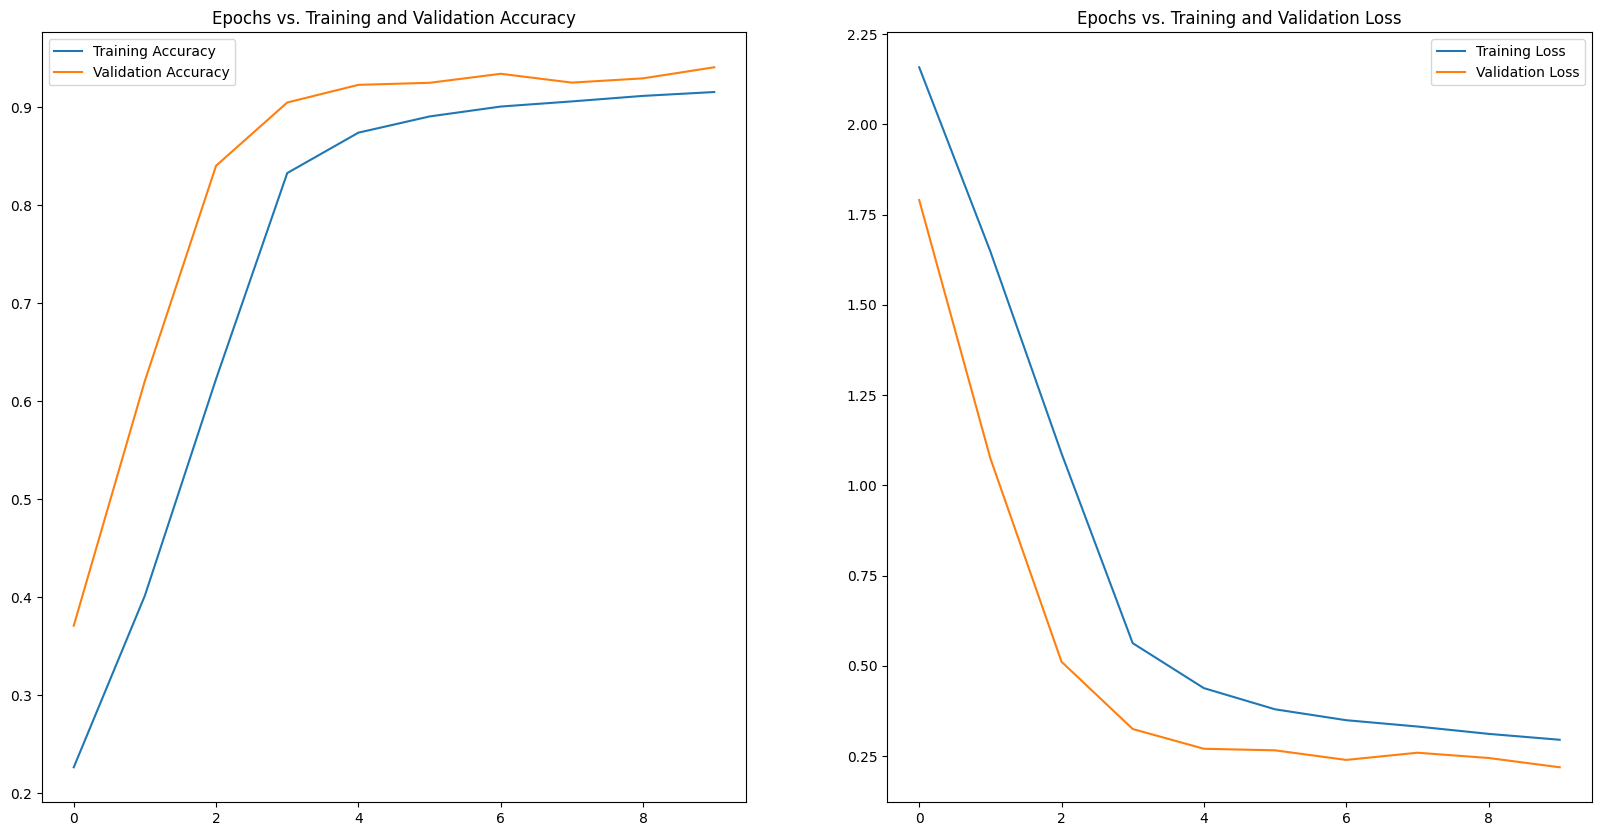

In [20]:
# Visualize epochs vs. train and validation accuracies and losses

plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend()
plt.title('Epochs vs. Training and Validation Accuracy')
    
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend()
plt.title('Epochs vs. Training and Validation Loss')

plt.show()

In [21]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(x=test_images, y=test_labels, verbose=0)

print('Test accuracy is: {:0.4f} \nTest loss is: {:0.4f}'.
      format(test_acc, test_loss))

Test accuracy is: 0.9494 
Test loss is: 0.1980


In [22]:
# Get predictions and apply inverse transformation to the labels

y_pred = model.predict(X_train)

1946/1946 [==============================] - 49s 25ms/step


In [23]:
y_pred = np.argmax(y_pred, axis=0)
y_train = np.argmax([y_train], axis=0) 

#y_pred = lb.inverse_transform(y_pred, lb.classes_)
#y_train = lb.inverse_transform(y_train, lb.classes_)

In [24]:
from PIL import *
import torchvision.transforms as transforms
import cv2
import torch
image = cv2.imread(r"C:\Users\Sanmitha\Documents\second.jpg")
img=torch.tensor(image)
print(img.shape)
pred=model.predict(img)
pred = np.argmax(pred, axis=0) 
print(pred)

torch.Size([533, 638, 3])


TypeError: Cannot convert the argument `type_value`: torch.uint8 to a TensorFlow DType.